In [1]:
library(readr)
library(plyr)
library(dplyr)
library(ggplot2)
library(reshape2)
library(Hmisc)
library(GGally)
library(corrplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:base':

    format.pval, units


Warning message:
"package 'GGally' was built under R version 4.0.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"package 'corrplot' was built under R version 4.0.3"
corrplot 0.84 loaded



In [2]:
df <- read.csv("E:\\DataScience\\Project\\Data\\No-Show-Datase.csv" ,header = TRUE,sep = ",")
#df <- read.csv("E:\\DataScience\\Project\\Data\\hair_salon_no_show_wrangled_df.csv",header = TRUE ,sep = "#")

In [3]:
head(df)

,id,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,92,3,6,3,2,3,2,0,0.0,6,...,0,0,0,0,0,0,0,0,0,0
2,93,3,5,3,2,3,2,1,119.8,5,...,1,82,1,1,0,1,0,0,0,41
3,94,3,3,3,1,3,1,0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
4,95,2,6,3,5,3,5,0,0.0,6,...,0,0,0,0,0,0,0,0,0,0
5,96,2,4,3,3,3,3,0,0.0,4,...,0,0,0,0,0,0,0,0,0,0
6,97,2,4,1,3,1,3,1,55.0,4,...,0,55,1,1,0,0,0,0,0,14


In [4]:
df$noshow <- as.factor(df$noshow)
df$book_category <- as.factor(df$book_category)
df$book_staff <- as.factor(df$book_staff)
#df[df$last_staff == ""] <- "aa" 
df$last_staff <- as.factor(df$last_staff)
df$last_category <- as.factor(df$last_category)
df$book_dow <- as.factor(df$book_dow)
df$book_tod <- as.factor(df$book_tod)


In [5]:
str(df)

'data.frame':	1952 obs. of  22 variables:
 $ id               : int  92 93 94 95 96 97 98 99 100 101 ...
 $ book_tod         : Factor w/ 4 levels "1","2","3","null": 3 3 3 2 2 2 3 1 2 2 ...
 $ book_dow         : Factor w/ 7 levels "1","2","3","4",..: 6 5 3 6 4 4 5 5 4 7 ...
 $ book_category    : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 1 1 1 1 3 ...
 $ book_staff       : Factor w/ 7 levels "1","2","3","4",..: 2 2 1 5 3 3 4 4 4 2 ...
 $ last_category    : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 1 1 1 1 3 ...
 $ last_staff       : Factor w/ 7 levels "1","2","3","4",..: 2 2 1 5 3 3 4 4 4 2 ...
 $ last_day_services: int  0 1 0 0 0 1 0 1 1 0 ...
 $ last_receipt_tot : num  0 120 0 0 0 ...
 $ last_dow         : int  6 5 3 6 4 4 5 5 4 7 ...
 $ last_tod         : chr  "3" "3" "3" "2" ...
 $ last_noshow      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ last_prod_flag   : int  0 1 0 0 0 0 0 0 0 0 ...
 $ last_cumrev      : int  0 82 0 0 0 55 0 65 135 0 ...
 $ last_cumbook     : int  0 1 0 0 0 1 0 1 2 0 ..

In [6]:
summary(df)

       id         book_tod   book_dow book_category book_staff last_category
 Min.   :   0.0   1   :548   1: 54    1: 347        1:196      1: 347       
 1st Qu.: 487.8   2   :735   2:  1    2:  74        2:722      2:  74       
 Median : 975.5   3   :434   3:391    3:1531        3:301      3:1531       
 Mean   : 975.5   null:235   4:291                  4:260                   
 3rd Qu.:1463.2              5:417                  5:436                   
 Max.   :1951.0              6:405                  6: 17                   
                             7:393                  7: 20                   
 last_staff last_day_services last_receipt_tot    last_dow    
 1:196      Min.   :0.0000    Min.   :  0.00   Min.   :1.000  
 2:722      1st Qu.:0.0000    1st Qu.:  0.00   1st Qu.:4.000  
 3:301      Median :0.0000    Median :  0.00   Median :5.000  
 4:260      Mean   :0.5451    Mean   : 35.78   Mean   :4.948  
 5:436      3rd Qu.:1.0000    3rd Qu.: 60.00   3rd Qu.:6.000  
 6: 17

In [7]:
# Does the staff match from the previous visist?
df$staff_match = ifelse(df$book_staff == df$last_staff, 1, 0)
df$staff_match = ifelse(is.na(df$staff_match), 0, df$staff_match)


In [8]:
# Does the category match from the previous visit?
df$category_match = ifelse(df$book_category == df$last_category, 1, 0)
df$category_match = ifelse(is.na(df$category_match), 0, df$category_match)

df <- select(df, - last_category, -last_staff)

Let See who gets more noshows among the staff?

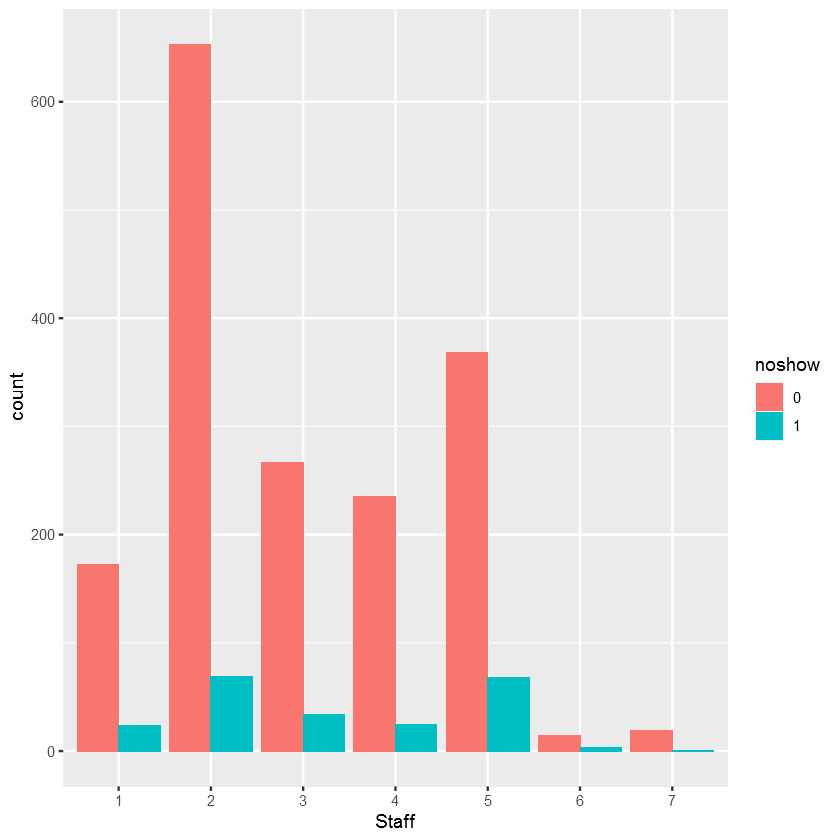

In [9]:
ggplot(df) +
  geom_bar(aes(x = book_staff, fill = noshow), position = "dodge") + xlab("Staff") 
  

#### It seems that Becky has a higher proportion of noshows.

Let Check if the total price of the previous receipt make the client no show for the next appoitment?

Warning message:
"Removed 1201 rows containing non-finite values (stat_boxplot)."


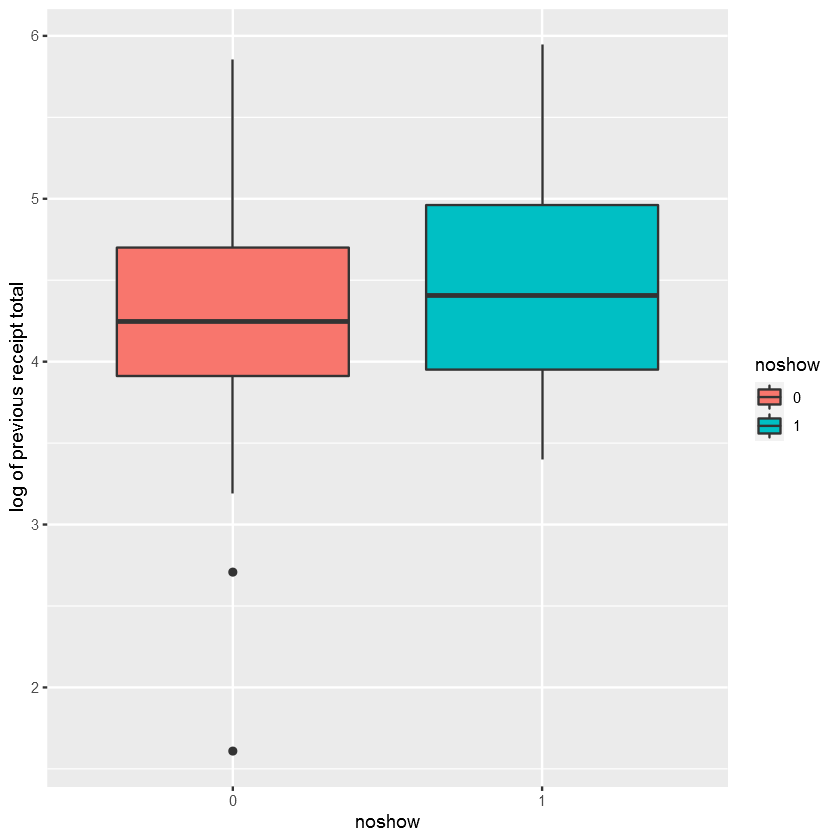

In [10]:
ggplot(df) +
  geom_boxplot(aes(x = noshow, y = log(last_receipt_tot), fill = noshow)) +
  ylab("log of previous receipt total")

#### According to the plot, there’s no significant difference.

What weekdays and time of the day do account for most of the noshows?

`summarise()` regrouping output by 'book_dow' (override with `.groups` argument)



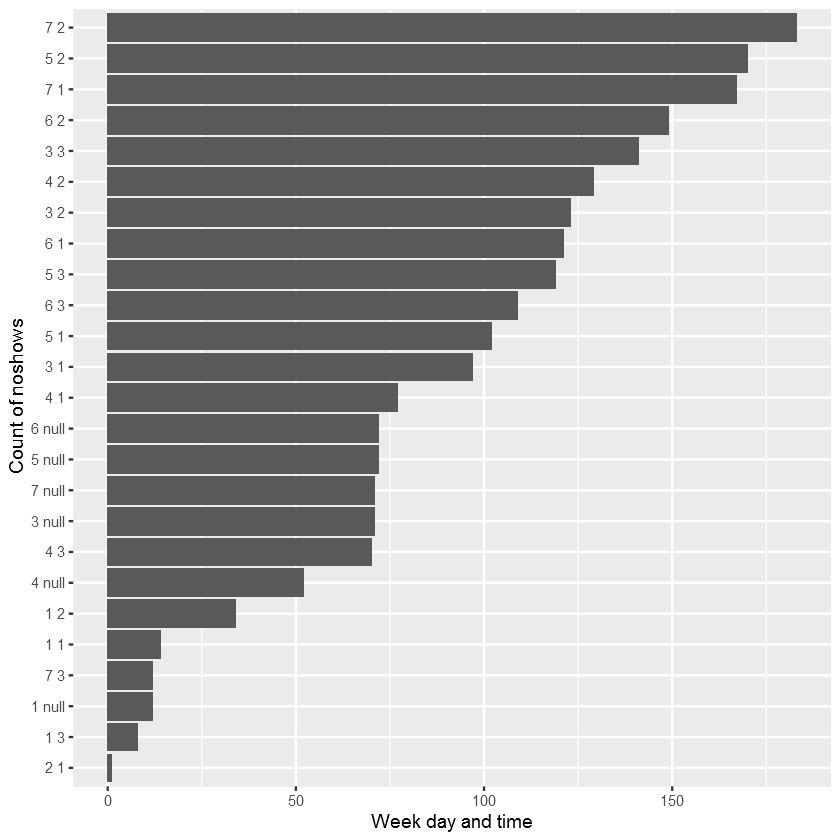

In [11]:
days_times = df %>% group_by(book_dow, book_tod) %>% summarise(count_noshows = sum(as.numeric(noshow))) %>% arrange(desc(count_noshows))

days_times$day_time = paste(days_times$book_dow, days_times$book_tod, sep = " ")

ggplot(days_times) +
  geom_bar(aes(x = reorder(day_time, count_noshows), y = count_noshows), stat = "identity") +
  coord_flip() +
  ylab("Week day and time") +
  xlab("Count of noshows") 
  #scale_x_continuous(breaks=c(0, 50, 65, 75, 150))



Saturday, Thursday, Friday afternoons and Saturday morning appointments tend to be skipped. 
There was only one noshow on Monday (maybe there’s not much Monday appointments at all?).

##  Hypothesis 1 


### The noshows are spread uniformly accros the weekdays and daytime. 

###  <span style='color:Blue'> Pearson's Chi-squared test  </span>

In [12]:
tab = t(xtabs(count_noshows ~ book_dow + book_tod, data = days_times))
chisq.test(tab)

Warning message in chisq.test(tab):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  tab
X-squared = 157.86, df = 18, p-value < 2.2e-16


Loading required package: vcd

Loading required package: grid



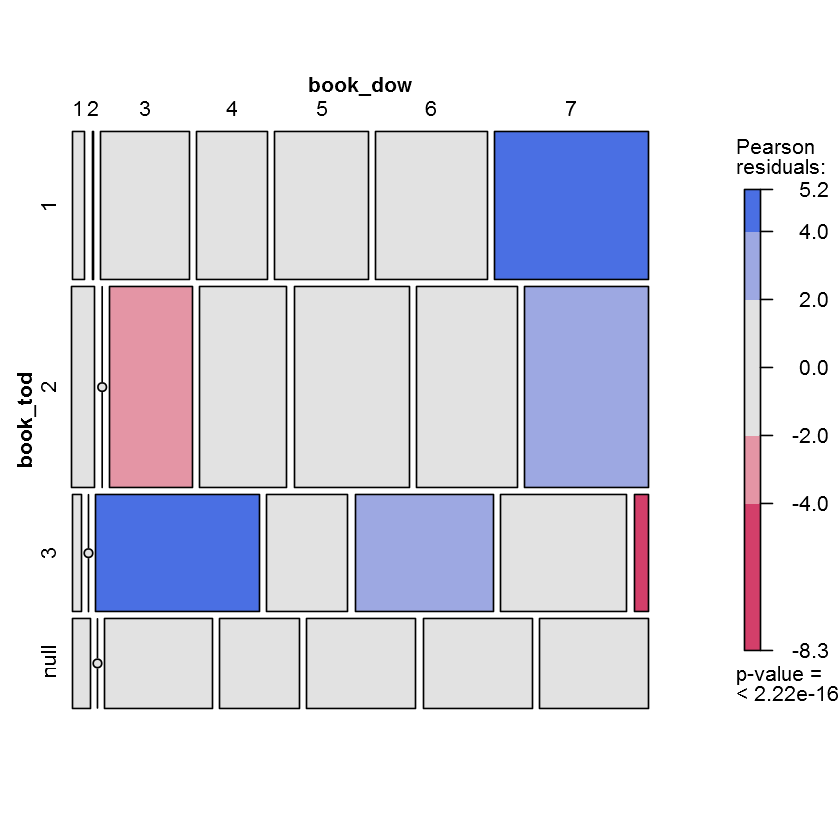

In [13]:
require(vcd)
mosaic(tab, shade=T, legend=T)

#### The chi-squared shows the significant difference (p-value < 2.22e-16). Tuesday evenings and Saturday mornings get disproportionally more noshows. Saturday evenings and Tuesday afternoons get much less noshows.

#### remove the only one observation on Monday.

In [14]:
df = filter(df, book_dow != "Monday")

In [15]:
head(df)

,id,book_tod,book_dow,book_category,book_staff,last_day_services,last_receipt_tot,last_dow,last_tod,last_noshow,...,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency,staff_match,category_match
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<chr>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>
1,92,3,6,3,2,0,0.0,6,3,0,...,0,0,0,0,0,0,0,0,1,1
2,93,3,5,3,2,1,119.8,5,3,0,...,1,1,0,1,0,0,0,41,1,1
3,94,3,3,3,1,0,0.0,3,3,0,...,0,0,0,0,0,0,0,0,1,1
4,95,2,6,3,5,0,0.0,6,2,0,...,0,0,0,0,0,0,0,0,1,1
5,96,2,4,3,3,0,0.0,4,2,0,...,0,0,0,0,0,0,0,0,1,1
6,97,2,4,1,3,1,55.0,4,2,0,...,1,1,0,0,0,0,0,14,1,1


#  Hypothesis 2

#### The noshows are spread uniformly across those clients who sets apponintments with the master they’d been working before and those who chooses a new one.

In [16]:

tab1 <- df %>% group_by(staff_match, noshow) %>% summarise(count = sum(as.numeric(noshow)))
tab1 = xtabs(count ~ staff_match + noshow, tab1)
chisq.test(tab1)
tab1

`summarise()` regrouping output by 'staff_match' (override with `.groups` argument)




	Chi-squared test for given probabilities

data:  tab1
X-squared = 752.94, df = 1, p-value < 2.2e-16


           noshow
staff_match    0    1
          1 1728  448

Warning message in legend(residuals, gpfun, residuals_type):
"All residuals are zero."


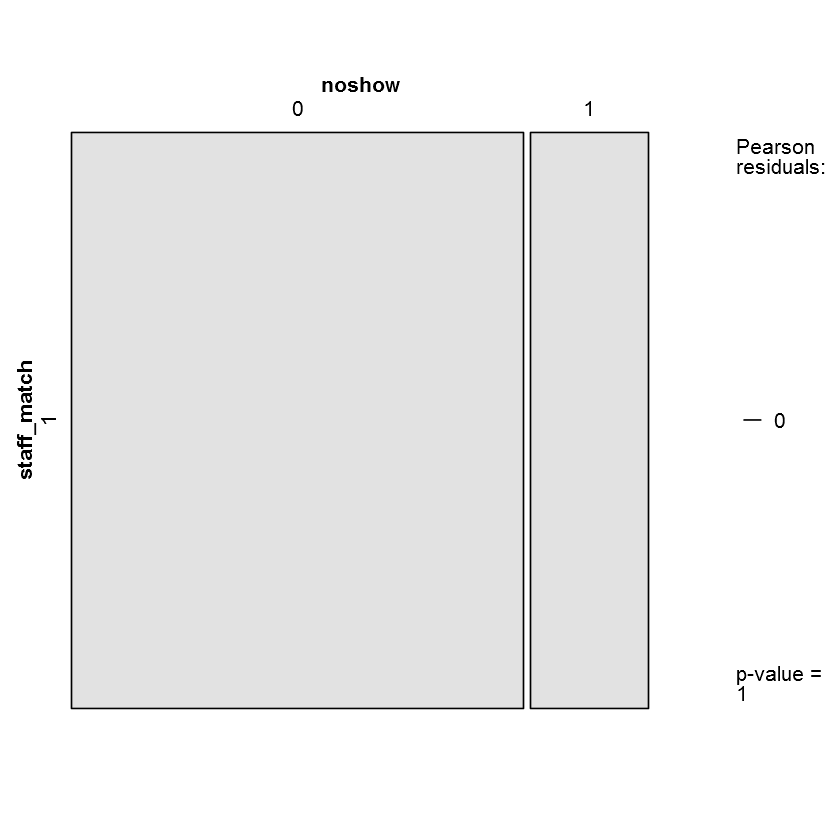

In [17]:
mosaic(tab1, shade=T, legend=T)

### The chi-squared is significant (p-value < 1.1615e-05). There is a significant difference. Those who sets an appointment with the previous master don’t show more often.

# Trees

# Let’s make test and train again. 80% goes to train, 20% to test.

In [18]:
library(caret)
set.seed(483)

df <- na.omit(df)

trainIndex <- createDataPartition(df$noshow, p = .8, 
                                  list = FALSE, 
                                  times = 1)
noshowTrain <- df[ trainIndex,]
noshowTest  <- df[-trainIndex,]

Warning message:
"package 'caret' was built under R version 4.0.3"

Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster




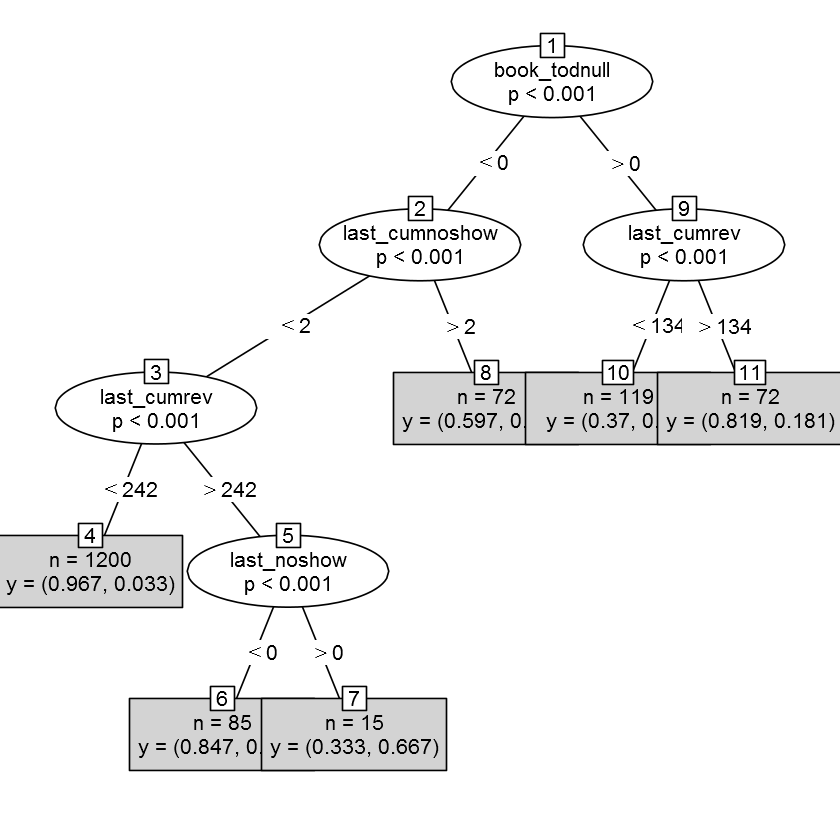

In [19]:
cv7 <- trainControl(method="cv", number = 7)
set.seed(483)
tree_model <- caret::train(noshow~., method = 'ctree', data = noshowTrain, trControl=cv7)
plot(tree_model$finalModel, type="simple") # use link below if the image is too messy

In [20]:
predictions.on.train <- predict(tree_model, noshowTrain)
confusionMatrix(predictions.on.train, noshowTrain$noshow, positive = "1", mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1334   95
         1   49   85
                                          
               Accuracy : 0.9079          
                 95% CI : (0.8924, 0.9218)
    No Information Rate : 0.8848          
    P-Value [Acc > NIR] : 0.0019231       
                                          
                  Kappa : 0.4914          
                                          
 Mcnemar's Test P-Value : 0.0001768       
                                          
              Precision : 0.63433         
                 Recall : 0.47222         
                     F1 : 0.54140         
             Prevalence : 0.11516         
         Detection Rate : 0.05438         
   Detection Prevalence : 0.08573         
      Balanced Accuracy : 0.71840         
                                          
       'Positive' Class : 1               
                                          

In [21]:
predictions.on.test <- predict(tree_model, noshowTest)
confusionMatrix(predictions.on.test, noshowTest$noshow, positive = "1", mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 337  21
         1   8  23
                                          
               Accuracy : 0.9254          
                 95% CI : (0.8947, 0.9495)
    No Information Rate : 0.8869          
    P-Value [Acc > NIR] : 0.007557        
                                          
                  Kappa : 0.5734          
                                          
 Mcnemar's Test P-Value : 0.025858        
                                          
              Precision : 0.74194         
                 Recall : 0.52273         
                     F1 : 0.61333         
             Prevalence : 0.11311         
         Detection Rate : 0.05913         
   Detection Prevalence : 0.07969         
      Balanced Accuracy : 0.74977         
                                          
       'Positive' Class : 1               
                                          

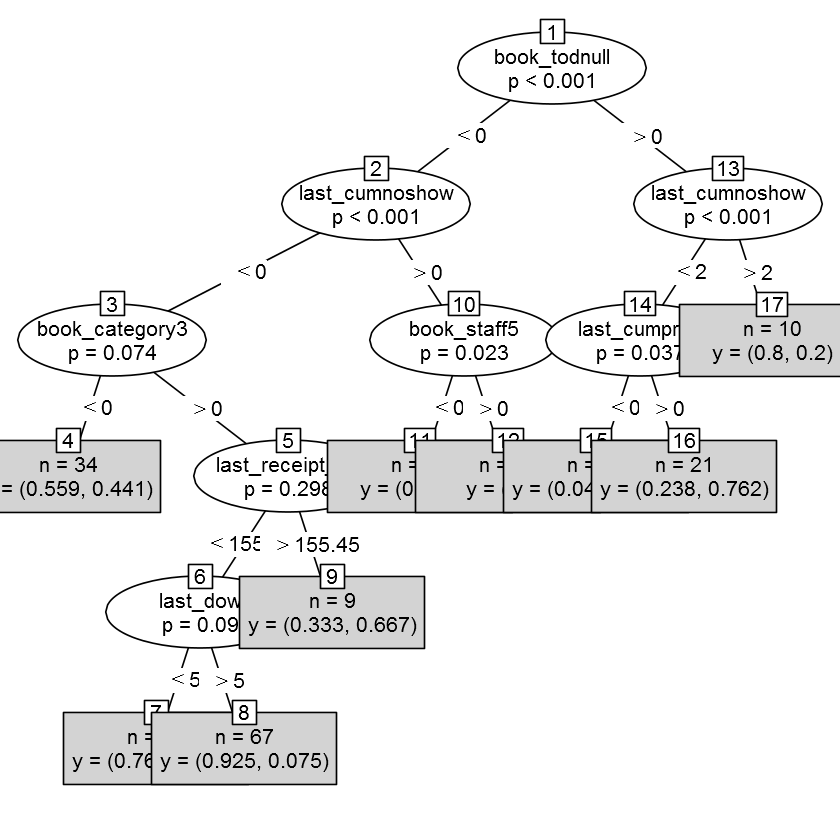

In [22]:
set.seed(555)
cv5 <- trainControl(method="cv", number = 5)
cv5_down<-cv5
cv5_down$sampling<-"down"

tree_model_down <- caret::train(noshow~., method = 'ctree', data = noshowTrain, trControl=cv5_down)
plot(tree_model_down$finalModel, type="simple")

In [23]:
d.on.train <- predict(tree_model_down, noshowTrain)
confusionMatrix(d.on.train, noshowTrain$noshow, positive = "1", mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1156   42
         1  227  138
                                          
               Accuracy : 0.8279          
                 95% CI : (0.8083, 0.8463)
    No Information Rate : 0.8848          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4164          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.37808         
                 Recall : 0.76667         
                     F1 : 0.50642         
             Prevalence : 0.11516         
         Detection Rate : 0.08829         
   Detection Prevalence : 0.23353         
      Balanced Accuracy : 0.80127         
                                          
       'Positive' Class : 1               
                                          

In [24]:
d.on.test <- predict(tree_model_down, noshowTest)
confusionMatrix(d.on.test, noshowTest$noshow, positive = "1", mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 295   8
         1  50  36
                                          
               Accuracy : 0.8509          
                 95% CI : (0.8116, 0.8848)
    No Information Rate : 0.8869          
    P-Value [Acc > NIR] : 0.9875          
                                          
                  Kappa : 0.4753          
                                          
 Mcnemar's Test P-Value : 7.303e-08       
                                          
              Precision : 0.41860         
                 Recall : 0.81818         
                     F1 : 0.55385         
             Prevalence : 0.11311         
         Detection Rate : 0.09254         
   Detection Prevalence : 0.22108         
      Balanced Accuracy : 0.83663         
                                          
       'Positive' Class : 1               
                                          

## Linear Regression models with and without regularization

In [25]:
library(caret)
set.seed(483)

df <- na.omit(df)
df$book_tod <- as.factor(df$book_tod)

trainIndex <- createDataPartition(df$noshow, p = .8, 
                                  list = FALSE, 
                                  times = 1)
noshowTrain <- df[ trainIndex,]
noshowTest  <- df[-trainIndex,]

lmodel <- glm(noshow~., data = noshowTrain, family = binomial(link = "logit"))
summary(lmodel)


Call:
glm(formula = noshow ~ ., family = binomial(link = "logit"), 
    data = noshowTrain)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3522  -0.3829  -0.3033  -0.2432   2.8599  

Coefficients: (6 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -8.950e-01  6.900e-01  -1.297  0.19456    
id                 4.929e-05  1.684e-04   0.293  0.76973    
book_tod2          3.197e-01  2.684e-01   1.191  0.23364    
book_tod3         -1.078e-04  3.365e-01   0.000  0.99974    
book_todnull       2.829e+00  2.777e-01  10.185  < 2e-16 ***
book_dow2         -1.465e+01  2.400e+03  -0.006  0.99513    
book_dow3         -1.254e+00  4.858e-01  -2.581  0.00986 ** 
book_dow4         -5.526e-01  4.991e-01  -1.107  0.26820    
book_dow5         -1.051e+00  4.819e-01  -2.182  0.02913 *  
book_dow6         -1.017e+00  4.742e-01  -2.144  0.03204 *  
book_dow7         -1.310e+00  4.901e-01  -2.672  0.00754 ** 
book_

In [26]:
pred = predict(lmodel, newdata = noshowTest, type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



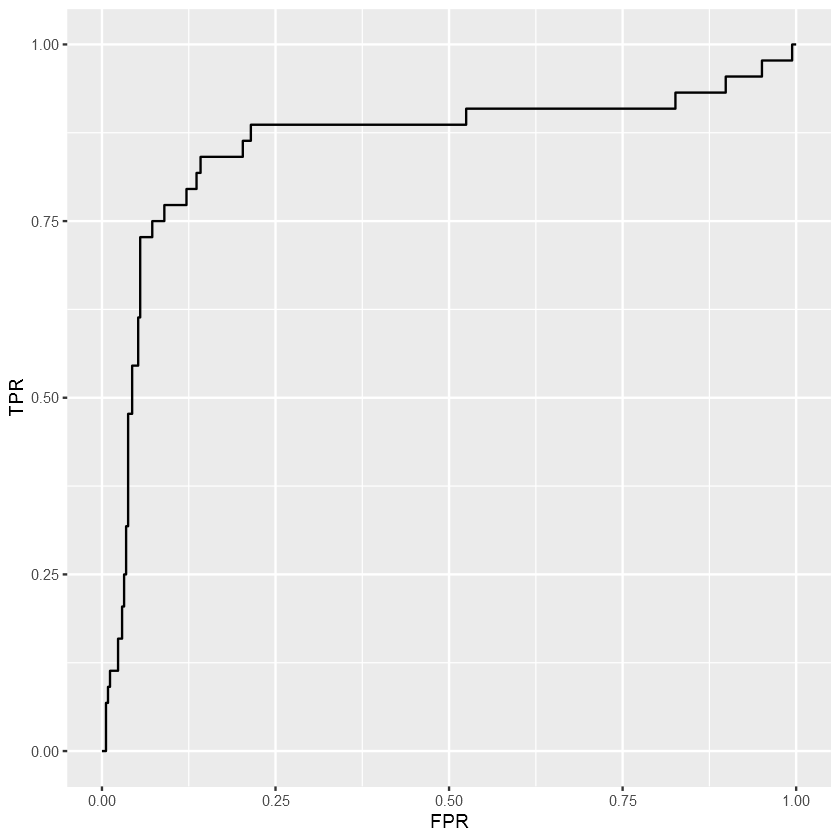

In [27]:
library(pROC)
ROC = roc(response = noshowTest$noshow, predictor = pred)
aucSimple = pROC::auc(ROC)

ggplot() + geom_path(aes(y=ROC$sensitivities, x=1-ROC$specificities))+
  xlab("FPR") + ylab("TPR")

# Regularization

Warning message:
"package 'glmnet' was built under R version 4.0.3"
Loading required package: Matrix

Loaded glmnet 4.0-2



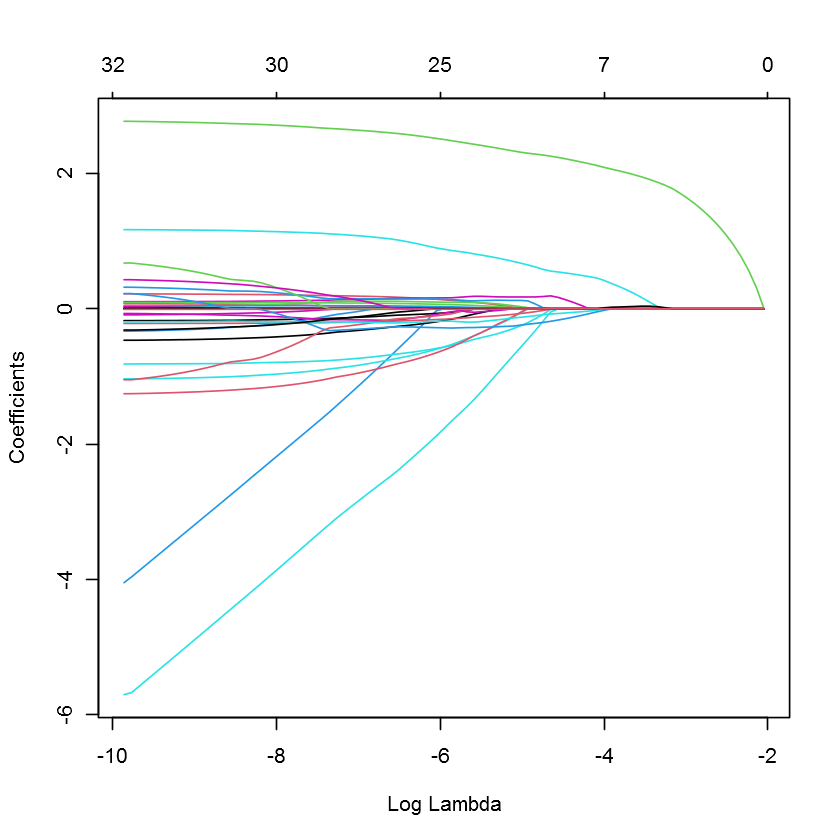

In [28]:
library(glmnet)

X.train <- model.matrix(noshow~.-noshow, data=noshowTrain)
X.test <- model.matrix(noshow~.-noshow, data=noshowTest)

glmnet.fit<-glmnet(X.train, noshowTrain$noshow, family = "binomial")

glmnet.predictions <- predict(glmnet.fit, X.test, type = "response")

plot(glmnet.fit,xvar="lambda")

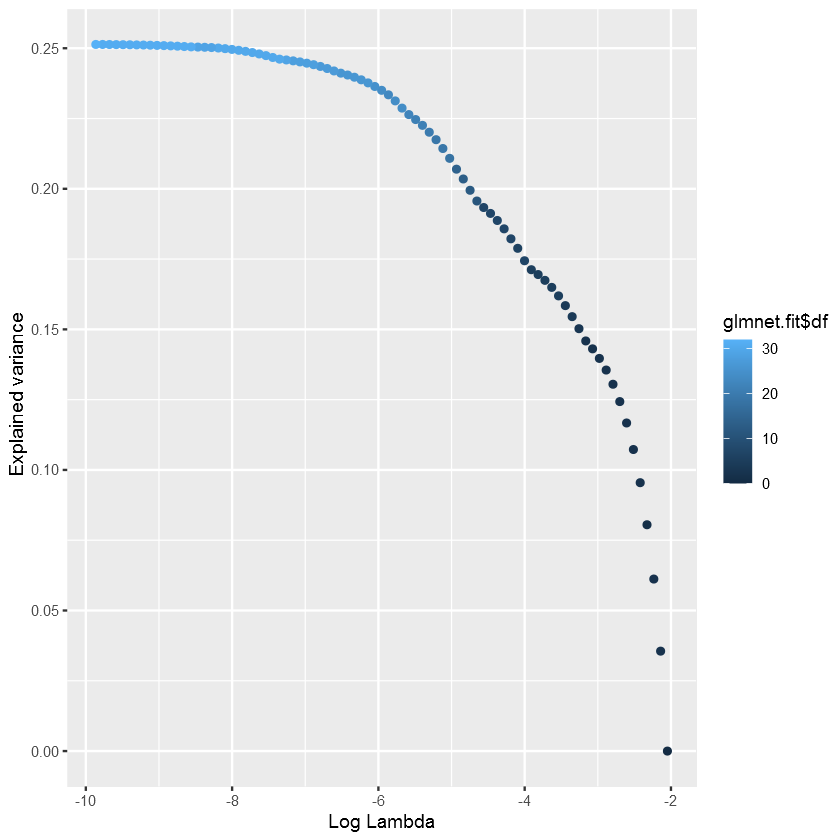

In [29]:
ggplot()+
  geom_point(aes(x=log(glmnet.fit$lambda), y=glmnet.fit$dev.ratio, color = glmnet.fit$df)) +
  xlab("Log Lambda") +
  ylab("Explained variance")

In [30]:
cv.glmnet.fit<-cv.glmnet(X.train, noshowTrain$noshow, family = "binomial")
best.lambda <- cv.glmnet.fit$lambda.min
best.lambda

[1] 0.002150788

In [31]:
glmnet.fit.best<-glmnet(X.train, noshowTrain$noshow, family = "binomial", lambda = best.lambda)
coef(glmnet.fit.best)

38 x 1 sparse Matrix of class "dgCMatrix"
                             s0
(Intercept)       -1.381049e+00
(Intercept)        .           
id                 3.627252e-05
book_tod2          6.012444e-03
book_tod3          .           
book_todnull       2.423427e+00
book_dow2         -1.455490e-01
book_dow3         -6.053665e-01
book_dow4          1.591421e-01
book_dow5         -7.469103e-02
book_dow6          1.396645e-02
book_dow7          .           
book_category2     1.448119e-01
book_category3    -6.276274e-01
book_staff2        .           
book_staff3       -2.076874e-01
book_staff4       -6.874201e-01
book_staff5        1.015203e-01
book_staff6        .           
book_staff7       -1.981900e+00
last_day_services -1.031894e-01
last_receipt_tot   3.523820e-03
last_dow          -1.637808e-01
last_tod2          2.116160e-01
last_tod3          .           
last_todnull       1.456412e-01
last_noshow        9.246918e-01
last_prod_flag     .           
last_cumrev        3.349635e-0

Setting levels: control = 0, case = 1

Warning message in roc.default(response = noshowTest$noshow, predictor = glmnet.predictions.best):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



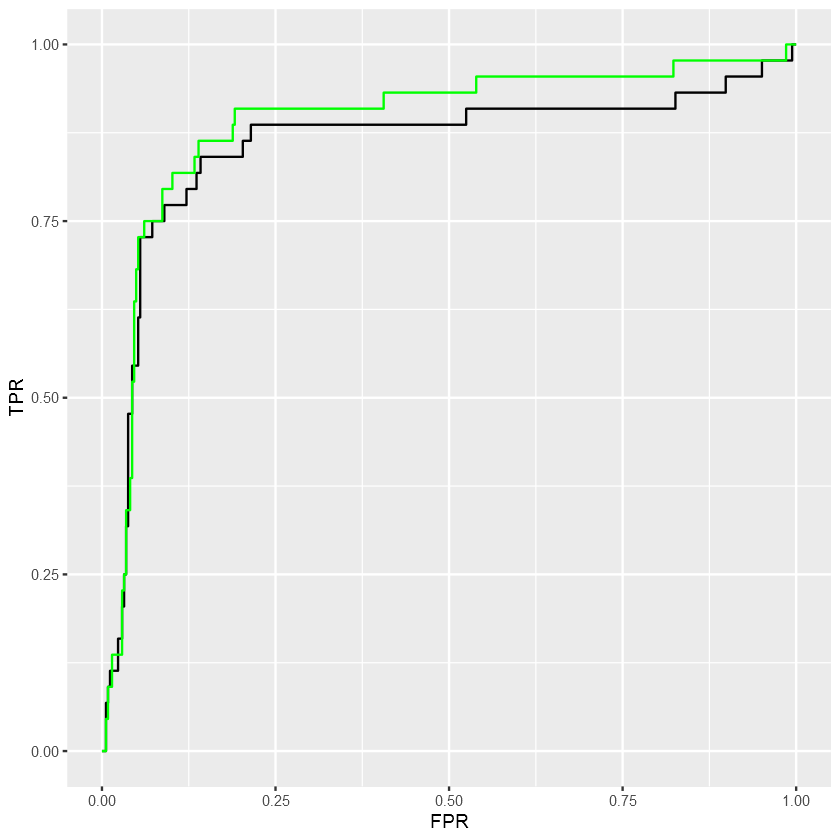

In [32]:
glmnet.predictions.best <- predict(glmnet.fit.best, X.test, type = "response")

ROC_lasso = roc(response = noshowTest$noshow, predictor = glmnet.predictions.best)
aucLasso = pROC::auc(ROC_lasso)

ggplot() + geom_path(aes(y=ROC$sensitivities, x=1-ROC$specificities), color = "black")+
  geom_path(aes(y=ROC_lasso$sensitivities, x=1-ROC_lasso$specificities), color = "green") +
  xlab("FPR") + ylab("TPR")

Setting levels: control = 0, case = 1

Warning message in roc.default(response = noshowTest$noshow, predictor = glmnet.predictions.ridge):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(response = noshowTest$noshow, predictor = glmnet.predictions.elastic):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



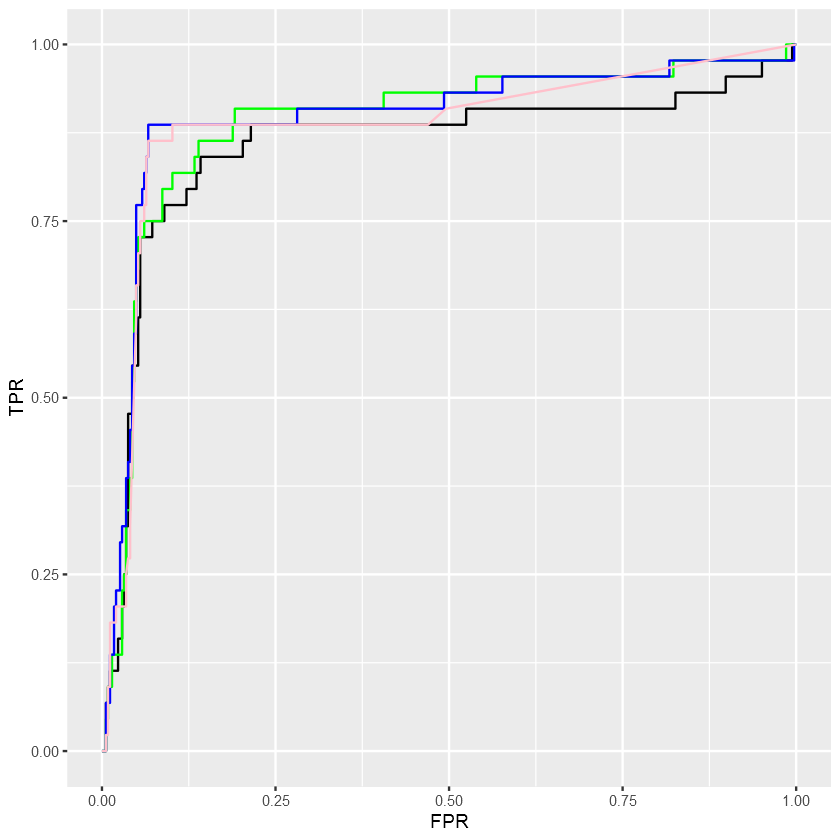

In [33]:
ridge <-cv.glmnet(X.train, noshowTrain$noshow, family = "binomial", alpha = 0)
elastic<-cv.glmnet(X.train, noshowTrain$noshow, family = "binomial", alpha = 0.5)

glmnet.predictions.ridge <- predict(ridge, X.test, type = "response")
glmnet.predictions.elastic <- predict(elastic, X.test, type = "response")

ROC_ridge = roc(response = noshowTest$noshow, predictor = glmnet.predictions.ridge)
aucRidge = pROC::auc(ROC_ridge)
ROC_elastic = roc(response = noshowTest$noshow, predictor = glmnet.predictions.elastic)
aucElastic = pROC::auc(ROC_elastic)

ggplot() + geom_path(aes(y=ROC$sensitivities, x=1-ROC$specificities), color = "black")+
  geom_path(aes(y=ROC_lasso$sensitivities, x=1-ROC_lasso$specificities), color = "green") +
  geom_path(aes(y=ROC_ridge$sensitivities, x=1-ROC_ridge$specificities), color = "blue") +
  geom_path(aes(y=ROC_elastic$sensitivities, x=1-ROC_elastic$specificities), color = "pink") +
  xlab("FPR") + ylab("TPR")